In [9]:
import pandas as pd

df = pd.read_excel('wine.xlsx')
df.head()

,y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
X = df.iloc[:, 1:]  # Features
y = df.iloc[:, 0]   # Target variable

In [11]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.decomposition import PCA

# Choose the number of components (e.g., 2)
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


In [14]:
import numpy as np

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative sum of explained variance ratios
cum_sum_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the number of components that explain 95% of the variance
n_components_95 = np.argmax(cum_sum_variance_ratio >= 0.95) + 1

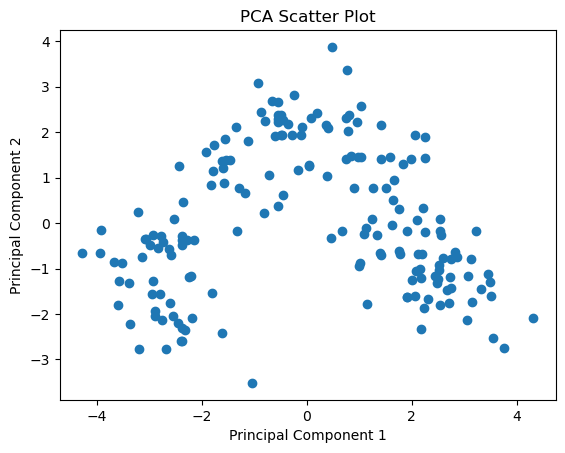

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()


In [17]:
from sklearn.cluster import KMeans

# Choose the number of clusters (e.g., 3)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#PCA: PCA reduces the dimensionality of the dataset while preserving the most important information. The scatter plot obtained from PCA shows the reduced data in a lower-dimensional space. Each point represents an instance, and the position on the scatter plot corresponds to its values along the principal components. The explained variance ratio indicates the amount of variance explained by each principal component.
#Clustering: The K-Means clustering algorithm is applied to the PCA-transformed data. It assigns each instance to one of the clusters based on its proximity to the cluster centroids. The number of clusters is a parameter set by the user. The cluster assignments can provide insights into the similarity or dissimilarity of the instances based on their PCA-transformed features. Further analysis, such as evaluating cluster quality or interpreting the characteristics of each cluster, can be performed to gain more insights.